# Explore here

In [41]:
import pandas as pd

df = pd.read_csv('/workspaces/machine-learning-python-template3/data/raw/medical_insurance_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Analysis

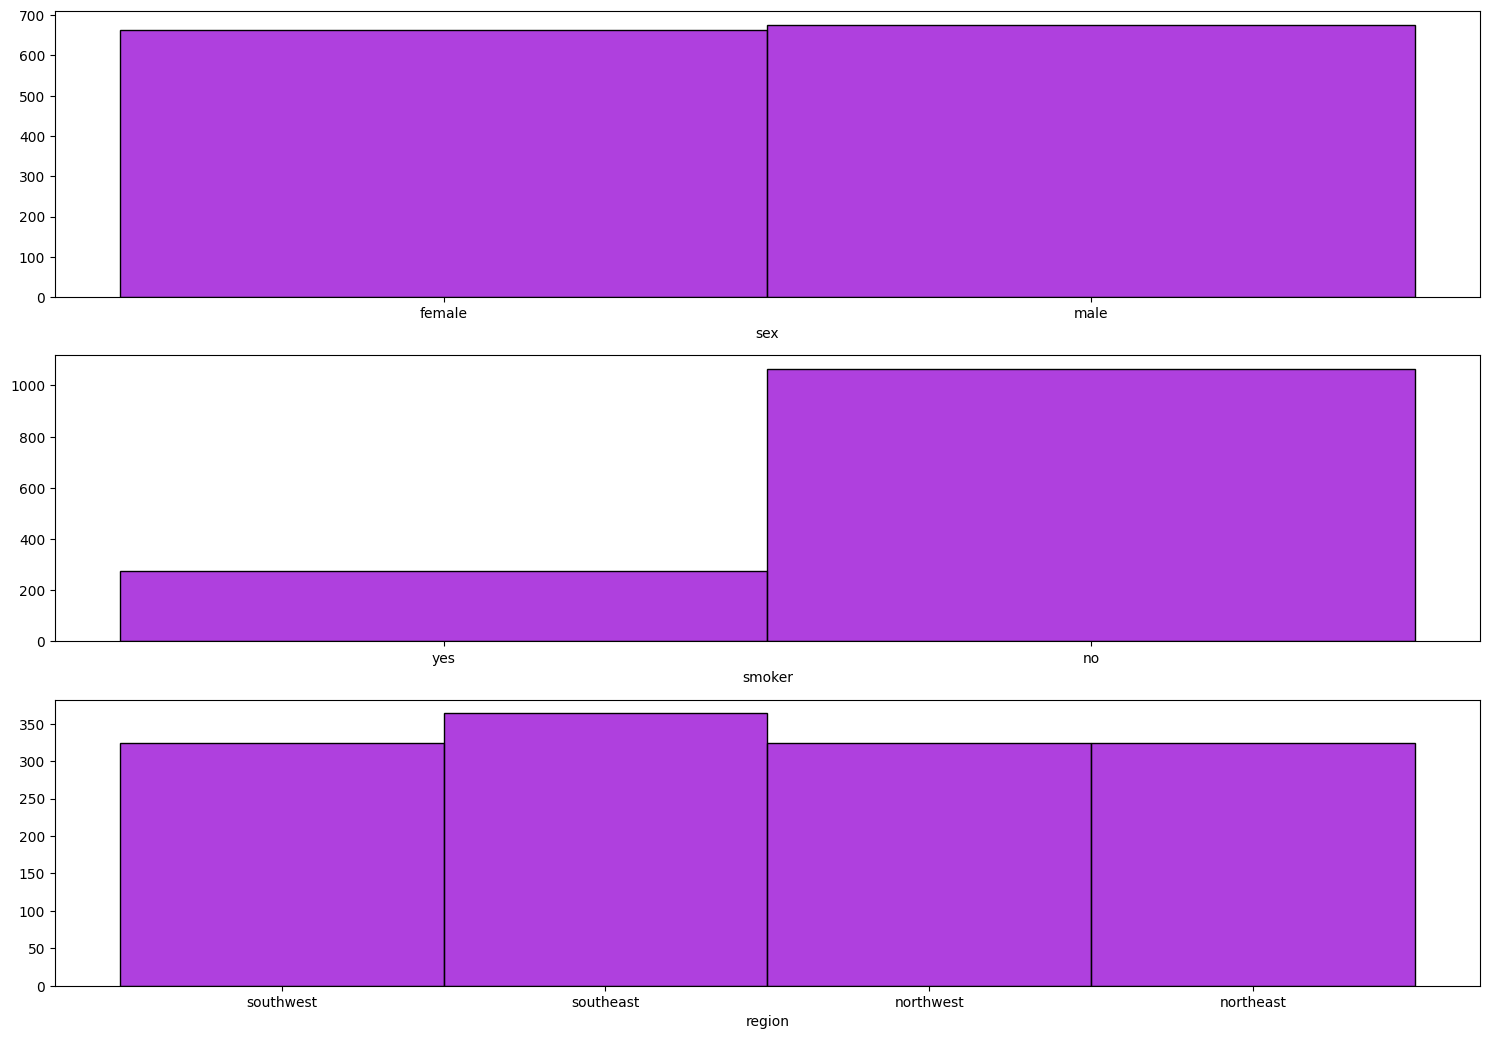

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 1, figsize = (15, 10.5))


cols = ['sex', 'smoker', 'region']

for col, ax in zip(cols, axis.ravel()): 
    sns.histplot(ax = ax, data = df, x = col, color = 'darkviolet').set(ylabel = None)



plt.tight_layout()


plt.show()

Most people are non-smokers males.

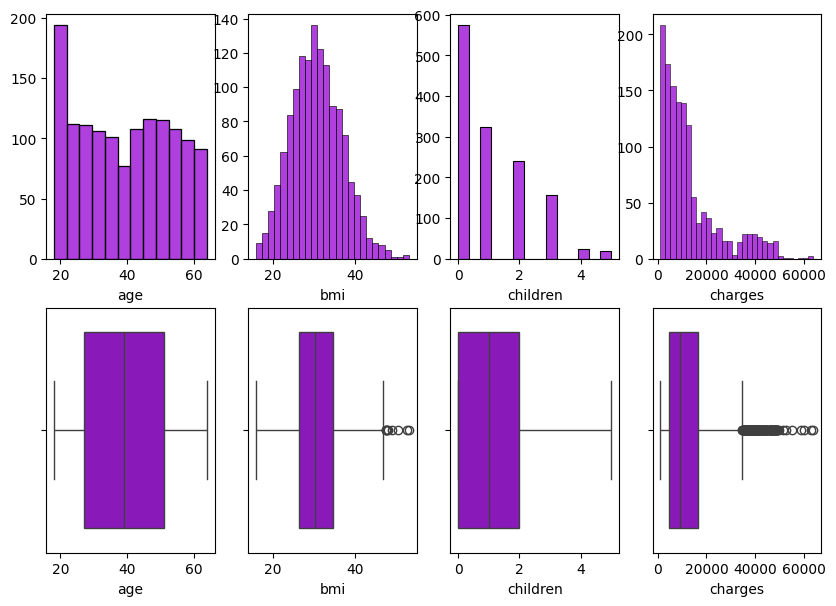

In [120]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7))


x_data = ['age', 'bmi', 'children', 'charges']

for i, col in enumerate(x_data):
    sns.histplot(ax=axis[0, i], data=df, x=col, color='darkviolet').set(ylabel=None)
    sns.boxplot(ax=axis[1, i], data=df, x=col, color='darkviolet')




plt.show()

The most affected variables by outliers are bmi and charges.

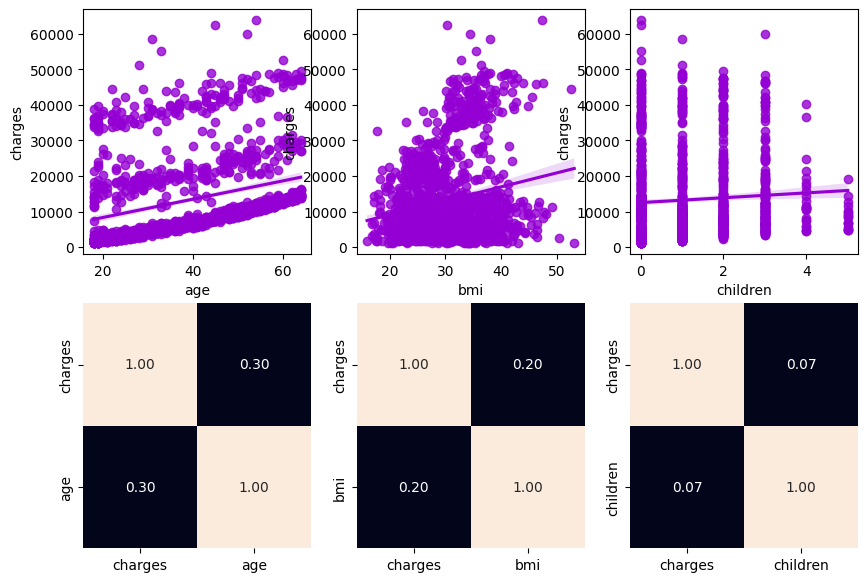

In [121]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))


x_data = ['age', 'bmi', 'children']

for i, col in enumerate(x_data):
    sns.regplot(ax = axis[0, i], data = df, x = col, y = 'charges', color = 'darkviolet')
    sns.heatmap(df[["charges", col]].corr(), annot = True, fmt = ".2f", ax = axis[1, i], cbar = False)




plt.show()

The strongest relationship is between the age and the charge, but it is still quite weak. 

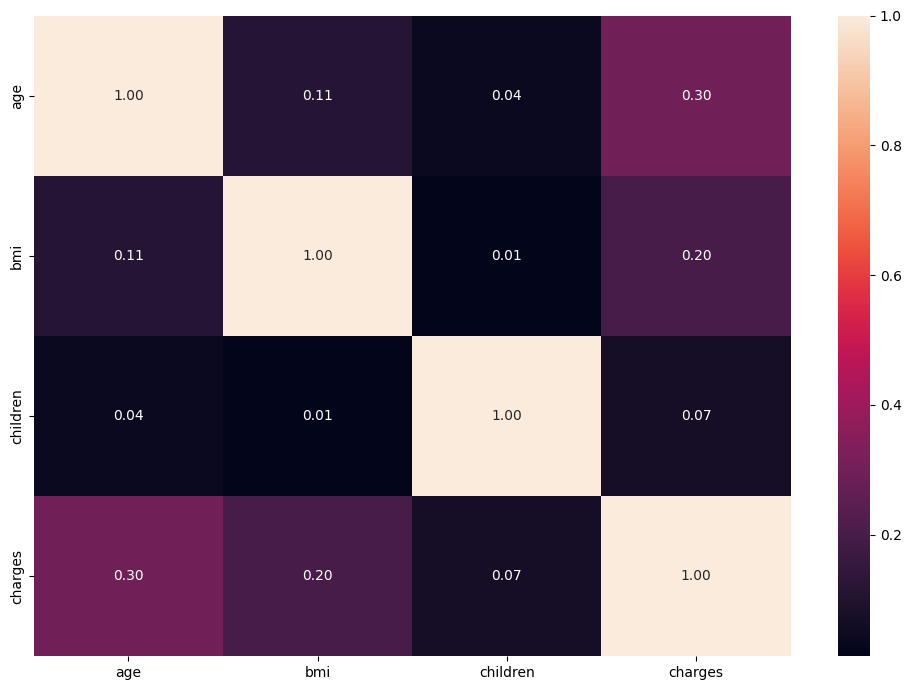

In [122]:
fig, axis = plt.subplots(figsize = (10, 7))

x_data = ['age', 'bmi', 'children', 'charges']

sns.heatmap(df[x_data].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

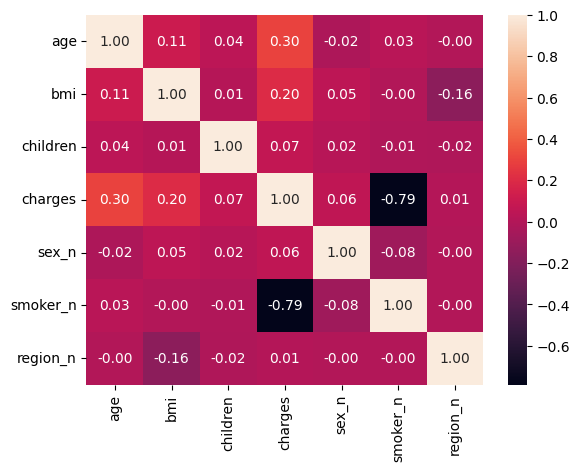

In [123]:
df['sex_n'] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df['region_n'] = pd.factorize(df["region"])[0]



data = ['age', 'bmi', 'children', 'charges', 'sex_n', 'smoker_n', 'region_n']
sns.heatmap(df[data].corr(), annot = True, fmt = ".2f")



plt.show()

Clearly there is a strong relationship between smoking and the targer. If you smoke, it will be more expensive.

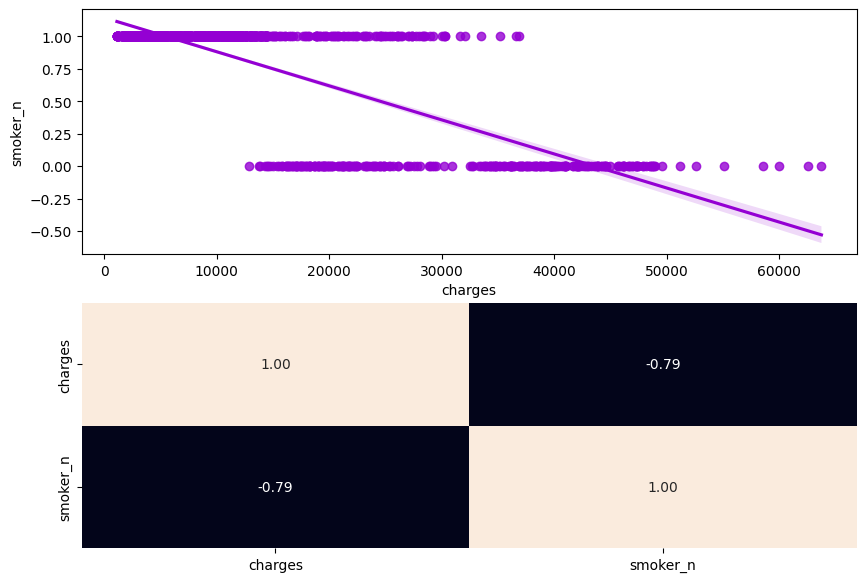

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, figsize=(10, 7))

sns.regplot(ax=axis[0], data=df, x='charges', y='smoker_n', color='darkviolet')
sns.heatmap(df[["charges", 'smoker_n']].corr(), annot=True, fmt=".2f", ax=axis[1], cbar=False)

plt.show()

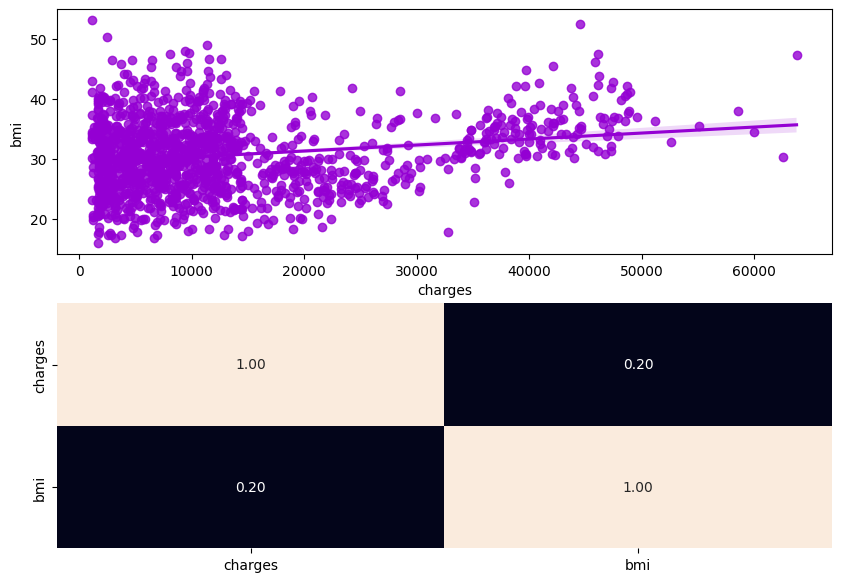

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, figsize=(10, 7))

sns.regplot(ax=axis[0], data=df, x='charges', y='bmi', color='darkviolet')
sns.heatmap(df[["charges", 'bmi']].corr(), annot=True, fmt=".2f", ax=axis[1], cbar=False)

plt.show()

I am not going to do anything with the outliers because I do not think that it is necessary

In [126]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

num_variables = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n']

X = df.drop("charges", axis = 1)[num_variables]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.to_csv("/workspaces/machine-learning-python-template3/data/raw/medical_train_X.csv", index=False)
with open("/workspaces/machine-learning-python-template3/data/raw/medical_train_y.txt", "w") as f:
    f.write(y_train.to_string(index=False))
X_test.to_csv("/workspaces/machine-learning-python-template3/data/raw/medical_test_X.csv", index=False)
with open("/workspaces/machine-learning-python-template3/data/raw/medical_test_y.txt", "w") as f:
    f.write(y_test.to_string(index=False))
X_train.head()

X_train.head()

,age,bmi,children,sex_n,smoker_n,region_n
560,46,19.95,2,0,1,2
1285,47,24.32,0,0,1,3
1142,52,24.86,0,0,1,1
969,39,34.32,5,0,1,1
486,54,21.47,3,0,1,2


In [153]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k= int(len(X_train.columns) * 0.7))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,children,sex_n,smoker_n,region_n
0,2.0,0.0,1.0,2.0
1,0.0,0.0,1.0,3.0
2,0.0,0.0,1.0,1.0
3,5.0,0.0,1.0,1.0
4,3.0,0.0,1.0,2.0


In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_sel)

num_variables = ['children', 'sex_n', 'smoker_n', 'region_n']

X_train_norm = scaler.transform(X_train_sel[num_variables])
X_train_norm = pd.DataFrame(X_train_norm, index = X_train_sel.index, columns = num_variables)

X_test_norm = scaler.transform(X_test_sel)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test_sel.index, columns = num_variables)

X_train_norm.head()

,children,sex_n,smoker_n,region_n
0,0.734336,-1.024602,0.508747,0.456116
1,-0.911192,-1.024602,0.508747,1.353256
2,-0.911192,-1.024602,0.508747,-0.441024
3,3.202629,-1.024602,0.508747,-0.441024
4,1.557100,-1.024602,0.508747,0.456116


In [147]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

In [155]:
X_train_sel.to_csv("/workspaces/machine-learning-python-template3/data/processed/slected_medicine_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template3/data/processed/selected_medicine_test.csv", index=False)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, X_train_sel["charges"])

LinearRegression()

In [ ]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 1.0913936421275139e-11
Coefficients (b): [ 3.96753656e-13 -7.37465644e-12 -3.77232344e-12 -4.16654219e-14
  1.00000000e+00]


There are multiple b coefficients because the linear regression is multiple.    

In [ ]:
y_pred = model.predict(X_test_sel)
y_pred

array([ 9095.06825 ,  5272.1758  , 29330.98315 ,  9301.89355 ,
       33750.2918  ,  4536.259   ,  2117.33885 , 14210.53595 ,
        3732.6251  , 10264.4421  , 18259.216   ,  7256.7231  ,
        3947.4131  , 46151.1245  , 48673.5588  , 44202.6536  ,
        9800.8882  , 42969.8527  ,  8233.0975  , 21774.32215 ,
        5080.096   ,  7441.501   ,  1256.299   ,  2755.02095 ,
       11085.5868  , 10923.9332  , 12644.589   , 18804.7524  ,
        9715.841   ,  1131.5066  , 15828.82173 , 11842.62375 ,
        2020.5523  ,  5693.4305  ,  2904.088   ,  7448.40395 ,
        2597.779   ,  7337.748   , 23887.6627  , 38709.176   ,
        4687.797   ,  2643.2685  , 11674.13    , 12124.9924  ,
        4889.9995  , 12333.828   ,  3579.8287  ,  4391.652   ,
       42124.5153  ,  4463.2051  , 13887.204   ,  1719.4363  ,
       28476.73499 ,  1708.92575 , 10594.2257  , 25333.33284 ,
        3645.0894  , 38746.3551  , 11848.141   , 10564.8845  ,
       13880.949   ,  4753.6368  , 27941.28758 ,  8017.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 2.1667000751246157e-23
Coefficient of determination: 1.0
